https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

spotify = pd.read_csv('spotify_2000.csv', thousands=',')
spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


The objective here to practice KNN would be, based on each track's audio features, would we be able to cluster similar genres/tracks together.

In [40]:
X = spotify.iloc[:,5:]
y = spotify['Top Genre']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(y)

array([ 2,  5,  8, ..., 34, 28,  2])

In [41]:
# KNN's sensitive to values as it's trained from calculating distance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(X.head())
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(f'\nX_normalized: \n{X.head()}')

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence  Length (Duration)  Acousticness  Speechiness  Popularity  
0       68                201            94            3          71  
1       81                207            17            7          39  
2       52                341             2           17          69  
3       37                269             0            4          76  
4       87                256             1            3          59  

X_normalized: 
   Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  Liveness  \
0                0.7100

In [42]:
spotify['genre_encoded'] = label_encoder.fit_transform(y)
genre_map = dict(zip(spotify.genre_encoded, spotify['Top Genre']))
genre_map

{2: 'adult standards',
 5: 'album rock',
 8: 'alternative hip hop',
 9: 'alternative metal',
 61: 'classic rock',
 11: 'alternative pop rock',
 136: 'pop',
 128: 'modern rock',
 75: 'detroit hip hop',
 12: 'alternative rock',
 82: 'dutch indie',
 102: 'garage rock',
 80: 'dutch cabaret',
 135: 'permanent wave',
 65: 'classic uk pop',
 71: 'dance pop',
 127: 'modern folk rock',
 84: 'dutch pop',
 79: 'dutch americana',
 7: 'alternative dance',
 104: 'german pop',
 3: 'afropop',
 42: 'british soul',
 115: 'irish rock',
 76: 'disco',
 32: 'big room',
 15: 'art rock',
 74: 'danish pop rock',
 131: 'neo mellow',
 43: 'britpop',
 36: 'boy band',
 49: 'carnaval limburg',
 13: 'arkansas country',
 122: 'latin alternative',
 39: 'british folk',
 51: 'celtic',
 55: 'chanson',
 53: 'celtic rock',
 110: 'hip pop',
 87: 'east coast hip hop',
 86: 'dutch rock',
 34: 'blues rock',
 89: 'electro',
 21: 'australian pop',
 30: 'belgian rock',
 78: 'downtempo',
 140: 'reggae fusion',
 40: 'british invasi

In [43]:
y = spotify['genre_encoded']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
X_train

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
538,0.810651,0.257732,0.302326,0.60,0.371134,0.177083,0.061410,0.545455,0.037736,0.539326
526,0.520710,0.773196,0.523256,0.88,0.061856,0.447917,0.122820,0.030303,0.037736,0.752809
1477,0.384615,0.226804,1.000000,0.56,0.020619,0.802083,0.102350,0.161616,0.075472,0.426966
1187,0.556213,0.402062,0.906977,0.48,0.164948,0.979167,0.163002,0.040404,0.056604,0.561798
1125,0.449704,0.185567,0.325581,0.44,0.061856,0.187500,0.110690,0.757576,0.018868,0.516854
...,...,...,...,...,...,...,...,...,...,...
835,0.603550,0.969072,0.511628,0.84,0.103093,0.937500,0.055345,0.424242,0.132075,0.629213
1216,0.615385,0.649485,0.558140,0.52,0.051546,0.656250,0.203184,0.010101,0.037736,0.460674
1653,0.461538,0.371134,0.604651,0.60,0.917526,0.427083,0.078089,0.686869,0.037736,0.516854
559,0.491124,0.587629,0.872093,0.88,0.061856,0.843750,0.129644,0.000000,0.037736,0.730337


In [46]:
y_train

538      81
526      32
1477    140
1187      2
1125      2
       ... 
835      56
1216     84
1653     12
559      71
684     136
Name: genre_encoded, Length: 1495, dtype: int64

<ipython-input-47-472f4a784a8c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot') # to use the color scheme of GNUplot


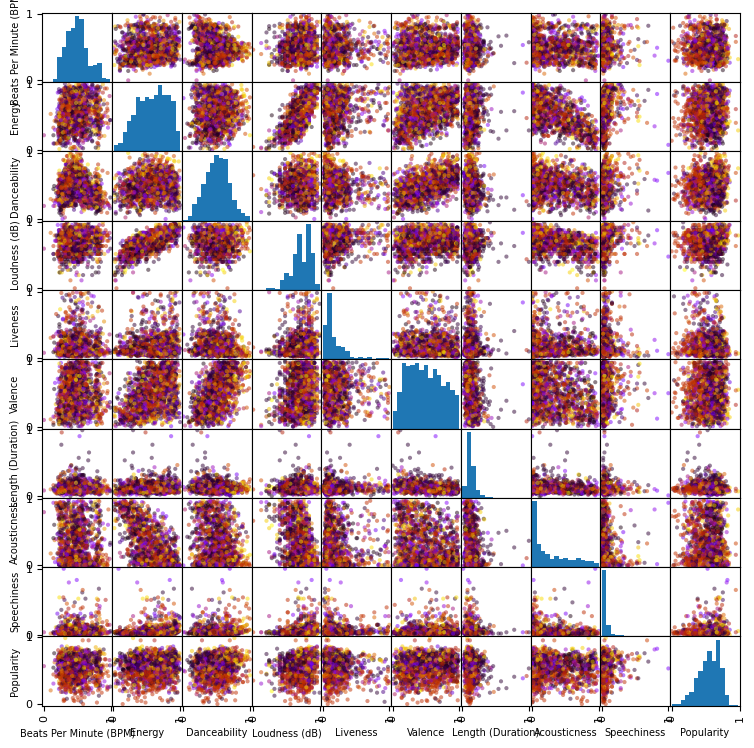

In [47]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot') # to use the color scheme of GNUplot
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap) # color by labels (top genre)

for ax in scatter.ravel():
    ax.xaxis.label.set_size(7)  # Set x-axis label size
    ax.yaxis.label.set_size(7)  # Set y-axis label size

plt.show()

There's no one pair that shows a good separation of genres, well, it might be due to the number of genres we got. It'll be hard to separate around 100 genres just with this pair plots.

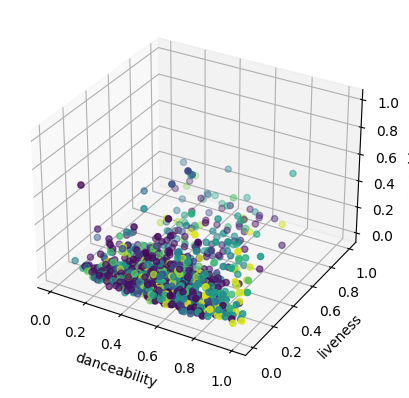

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Danceability'], X_train['Liveness'], X_train['Speechiness'], c=y_train, marker='o')
ax.set_xlabel('danceability')
ax.set_ylabel('liveness')
ax.set_zlabel('speechiness')
plt.show()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
knn.score(X_test, y_test) # not very good!

0.18236472945891782

([<matplotlib.axis.XTick at 0x7970dcbf1240>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

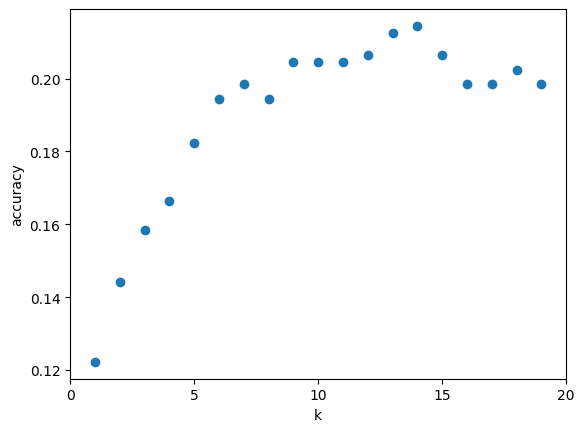

In [53]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

One thing about KNN is that KNN needs to remember all training data to make a prediction, which doesn't sound efficient as the training set gets larger.

One thought on posts regarding bias in ML algorithm - I think bias from the algorithm comes from the training dataset which inevitably has human bias, so isn't it obvious if the model is trained by (biased-unfiltered) dataset, the model gets biased in a similar way?